# Import libraries

In [73]:
import numpy as np 

import matplotlib.pyplot as plt

# The Method
The actual implementation of Newtons method requires you be able to differentiate the function in question. It also relies on and understanding of taylor expansions which will be reviewed here. 

## Taylor Expansion: Basics/Background

The basic idea behind the Taylor expansion is to take any smooth function and represent it as a finite sum of polynomial terms. This takes many functions and makes them differentiable. 

So to start from the basics are the rules of differentiation. These are some particularly important ones to remember:

- The derivative of a constant is $0$
- The derivative of $ax$ is $a$ (e.g. $f(x)=2x$ and $f'(x)=2$)
- The derivative of $x^{2}$ is $nx^{n-1}$ (e.g. $f(x)=x^{3}$ and $f'(x)=3x^{2}$)

Next we want to also define the general formula for an $n$th degree polynomial:

$$f(x)=a_{0}+a_{1}(x-c)+a_{2}(x-c)^{2})+a_{3}(x-c)^{3}+\dots$$

Here $a_{n}$ are the coefficients of each polynomial term, c is a constant accounting for where along the x-axis we start the approximation. The approximation of $f(x)$ can be calculated from the sum of these polynomial terms.

## Taylor Expansion: Polynomial differentiation

The goal of the Taylor expansion is to find rational values for the coefficients $a_{n}$, given a function $f$ and initial value $c$.

$$f(x)=a_{0}+a_{1}(x-c)+a_{2}(x-c)^{2})+a_{3}(x-c)^{3}+\dots$$

For background sake the mechanism by which this is accomplished is by taking the first few derivatives:

$$f'(x)=a_{1}+2a_{2}(x-c)+3a_{3}(x-c)^{2}+4a_{4}(x-c)^{3}+\dots$$

$$f''(x)=2a_{2}+6a_{3}(x-c)+12a_{4}(x-c)^{2}+20a_{5}(x-c)^{3}+\dots$$

$$f'''(x)=6a_{3}+24a_{4}(x-c)+60a_{5}(x-c)^{2}+120a_{6}(x-c)^{3}+\dots$$

$$f''''(x)=24a_{4}+120a_{5}(x-c)+360a_{6}(x-c)^{2}+\dots$$

$$f'''''(x)=120a_{5}+720a_{6}(x-c)+\dots$$

$$f''''''(x)=720a_{6}+\dots$$

$$\vdots$$

For taylor expansions, the most important aspect is the first term of each subsequatial derivative $n$ the first term is:

$$n! * a_{n}$$

Since each of the sequential terms after the leading term involve an $(x-c)$, we can elimiate those terms by evaluating each derivative at $x=c$.

Therefore the series of derivatives would become:

$$f(c)=a_{0}=a_{0}*0!$$

$$f'(c)=a_{1}=a_{1}*1!$$

$$f''(c)=2a_{2}=a_{2}*2!$$

$$f'''(c)=6a_{3}=a_{3}*3!$$

$$f''''(c)=24a_{4}=a_{4}*4!$$

$$f'''''(c)=120a_{5}=a_{5}*5!$$

$$f''''''(c)=720a_{6}=a_{6}*6!$$

## Taylor Expansion: Solving for coefficients

Therefore we can solve for the coefficients of the polynomial since we know the derivative of $f(x)$ and a simple factorial. Rearranging the above sequence to solve for the coefficient:

$$a_{0} = \frac{f(c)}{0!}$$

$$a_{1} = \frac{f'(c)}{1!}$$

$$a_{2} = \frac{f''(c)}{2!}$$

$$a_{3} = \frac{f'''(c)}{3!}$$

$$a_{4} = \frac{f''''(c)}{4!}$$

$$\vdots$$

$$a_{n} = \frac{f^{'nth}(c)}{n!}$$

Generally, the $n$th coefficient is the $n$th derivative evaluated at $c$ and divided by $n!$.

The final step of the taylor expansion is to then plug the coefficients back into the original series. Where the general polynomial was:

$$f(x)=a_{0}+a_{1}(x-c)+a_{2}(x-c)^{2})+a_{3}(x-c)^{3}+\dots$$

and the Taylor expansion is:

$$f(x)=\frac{f(c)}{0!} + \frac{f'(c)}{1!}(x-c) + \frac{f''(c)}{2!}(x-c)^{2} + \frac{f'''(c)}{3!}(x-c)^{3} + \dots$$



## Taylor Expansion: Example

In [62]:
def f(x):
    
    y = np.cos(x)
    
    return y

def df(x):
    
    y = - np.sin(x)
    
    return y

def d2f(x):
    
    y = - np.cos(x)

    return y

def d3f(x):
    
    y = np.sin(x)
    
    return y

def d4f(x):
    
    y = np.cos(x)
    
    return y

def d5f(x):
    
    y = - np.sin(x)
    
    return y

def d6f(x):
    
    y = - np.cos(x)
    
    return y

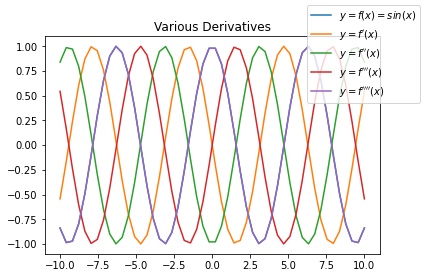

In [72]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-10, 10)

ax.plot(x, f(x), label='$y=f(x)=sin(x)$')
ax.plot(x, df(x), label="$y=f'(x)$")
ax.plot(x, d2f(x), label="$y=f''(x)$")
ax.plot(x, d3f(x), label="$y=f'''(x)$")
ax.plot(x, d4f(x), label="$y=f''''(x)$")

fig.legend()

ax.set_title('Various Derivatives')

plt.show()

In [50]:
def facto(x):
    
    x = np.math.factorial(x)
    
    return x

Here we can show the approximation in real time.

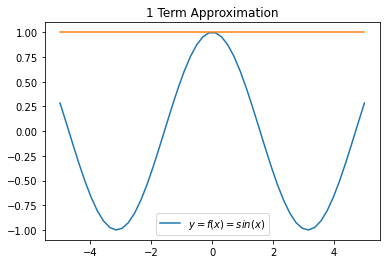

In [54]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-5, 5)

def taylor(x, c):
    
    y = (f(c)/facto(0)) + (df(c)/facto(1)) * (x-c) 
    
    return y

ax.plot(x, f(x), label='$y=f(x)=sin(x)$')
ax.plot(x, taylor(x,0))

ax.set_title('1 Term Approximation')
ax.legend()

plt.show()

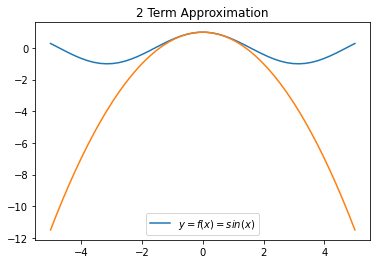

In [66]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-5, 5)

def taylor(x, c):
    
    y = (f(c)/facto(0)) + (df(c)/facto(1)) * (x-c) + (d2f(c)/facto(2)) * (x-c)**2 
    
    return y

ax.plot(x, f(x), label='$y=f(x)=sin(x)$')
ax.plot(x, taylor(x,0))

ax.set_title('2 Term Approximation')

ax.legend()

plt.show()

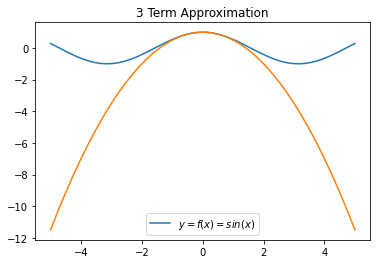

In [67]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-5, 5)

def taylor(x, c):
    
    y = (f(c)/facto(0)) + (df(c)/facto(1)) * (x-c) + (d2f(c)/facto(2)) * (x-c)**2 + (d3f(c)/facto(3)) * (x-c)**3 
    
    return y

ax.plot(x, f(x), label='$y=f(x)=sin(x)$')
ax.plot(x, taylor(x,0))

ax.set_title('3 Term Approximation')

ax.legend()

plt.show()

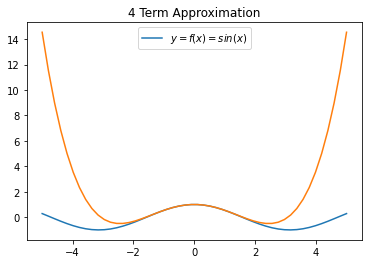

In [68]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-5, 5)

def taylor(x, c):
    
    y = (f(c)/facto(0)) + (df(c)/facto(1)) * (x-c) + (d2f(c)/facto(2)) * (x-c)**2 + (d3f(c)/facto(3)) * (x-c)**3 + (d4f(c)/facto(4)) * (x-c)**4 
    
    return y

ax.plot(x, f(x), label='$y=f(x)=sin(x)$')
ax.plot(x, taylor(x,0))

ax.set_title('4 Term Approximation')

ax.legend()

plt.show()

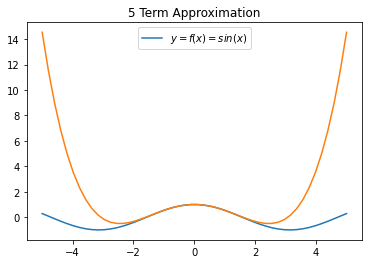

In [69]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-5, 5)

def taylor(x, c):
    
    y = (f(c)/facto(0)) + (df(c)/facto(1)) * (x-c) + (d2f(c)/facto(2)) * (x-c)**2 + (d3f(c)/facto(3)) * (x-c)**3 + (d4f(c)/facto(4)) * (x-c)**4 + (d5f(c)/facto(5)) * (x-c)**5
    
    return y

ax.plot(x, f(x), label='$y=f(x)=sin(x)$')
ax.plot(x, taylor(x,0))

ax.set_title('5 Term Approximation')

ax.legend()

plt.show()

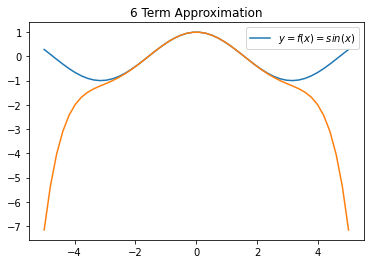

In [71]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(-5, 5)

def taylor(x, c):
    
    y = (f(c)/facto(0)) + (df(c)/facto(1)) * (x-c) + (d2f(c)/facto(2)) * (x-c)**2 + (d3f(c)/facto(3)) * (x-c)**3 + (d4f(c)/facto(4)) * (x-c)**4 + (d5f(c)/facto(5)) * (x-c)**5 + (d6f(c)/facto(6)) * (x-c)**6
    
    return y

ax.plot(x, f(x), label='$y=f(x)=sin(x)$')
ax.plot(x, taylor(x,0))

ax.set_title('6 Term Approximation')

ax.legend()

plt.show()

Clearly we can see the approximation getting better as more terms are taken. Since taylor series only work on smooth functions which means its infinitelhy diferentiable, this process can be continued to arbitrary precision. 

## Newtons Method: Procedure

Take for example a function $f(x)$ and an initial approximation $x_{0}$ of the root $f(x)=0$ and $h$ is the error associated with this approximation. Therefore the true root of the function would be $x_{0}+h$ and such that $f(x_{0}+h)=0$.

The Taylor expansion for this $f(x_{0}+h)=0$ can be given by the series:

$$f(x_{0}+h)=f(x_{0})+(h*f'(x))+(\frac{h^{2}*f''(x_{0})}{2!})+(\frac{h^{3}*f'''(x_{0})}{3!})+\dots$$

But if the initial guess is relatively close to the root $h$ is small so the quadratic and higher terms should become increasingly negligable (e.g. $h^{2}, h^{3}, h^{4}, h^{5},\dots$) and for those terms we set $h=0$. Therefore the Taylor expansion and root become:

$$f(x_{0})+h*f'(x_{0})=0$$

Then we can solve for the error by setting the equation equal to $h$:

$$h=\frac{-f(x_{0})}{f'(x_{0})}$$ 

Therefore we can find the next best approximation to the root by adding $h$ to $x_{0}$:

$$x_{1}=x_{0}+(\frac{-f(x_{0})}{f'(x_{0})})=x_{0}-\frac{f(x_{0})}{f'(x_{0})}$$

And more generally we can take $n$ iterations:

$$x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})}$$

# Example 1

Find the root of:

$$f(x)=x^{3}-4x-9$$

where there derivative of $f(x)$:

$$f'(x)=3x^{2}-4$$

Starting with an initial guess of 500 we can see it quickly converges. 

In [178]:
def f(x):
    
    y = x**3 - 4*x - 9
    
    return y

def df(x):
    
    y = 3*x**2 - 4
    
    return y

x = 50
iterations = 20

convergence = []

for i in range(iterations):
    
    print(f'x = {x}')
    
    x = x - (f(x)/df(x))
    
    convergence.append(x)
    
convergence = np.array(convergence)
print(f'x = {x}')

x = 50
x = 33.35232123799359
x = 22.264264457127073
x = 14.888943518608087
x = 9.999639745171756
x = 6.786927546123391
x = 4.726563722738375
x = 3.493850380925145
x = 2.8907415232318203
x = 2.7201990070202107
x = 2.706611623256172
x = 2.706527957659822
x = 2.706527954497935
x = 2.706527954497935
x = 2.706527954497935
x = 2.706527954497935
x = 2.706527954497935
x = 2.706527954497935
x = 2.706527954497935
x = 2.706527954497935
x = 2.706527954497935


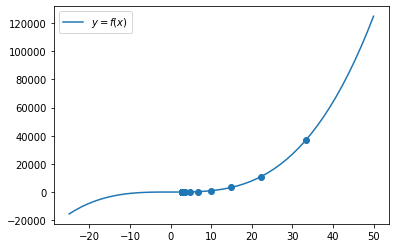

In [190]:
ax = plt.axes()

x=np.linspace(-25, 50)

ax.plot(x, f(x), label='$y=f(x)$')
ax.scatter(convergence, f(convergence))

ax.legend()

plt.show()

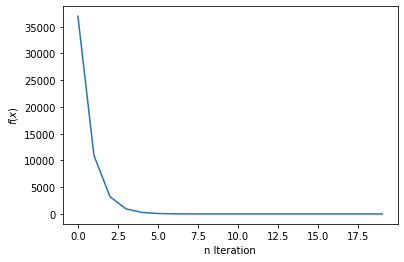

In [188]:
ax = plt.axes()

ax.plot(range(20), f(convergence))

ax.set_xlabel('n Iteration')
ax.set_ylabel('$f(x)$')

plt.show()

# Geometric explanation

Basically the way newtons method works is take a guess $x_{n}$ and calculate the line tangent to $f(x_{n})$. Where the tangent line intersects the x-axis becomes $x_{n+1}$.

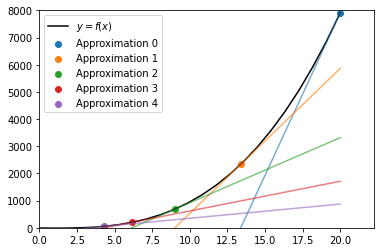

In [179]:
def tangent(x0, x):
    
    y = df(x0)*(x-x0)+f(x0) 
    
    return y

ax = plt.axes()

x = np.linspace(-25, 20)
ax.plot(x, f(x), 'k', label='$y=f(x)$')

# initial guess
x0 = 20

# number iterations
for i in range(5):
    
    ax.plot(x, tangent(x0, x), alpha=0.6)
    ax.scatter(x0, f(x0), label=f"Approximation {i}")
    
    x0 = x0 - (f(x0)/df(x0))

ax.set_xlim(0)
ax.set_ylim(0, 8000)

ax.legend()

plt.show()